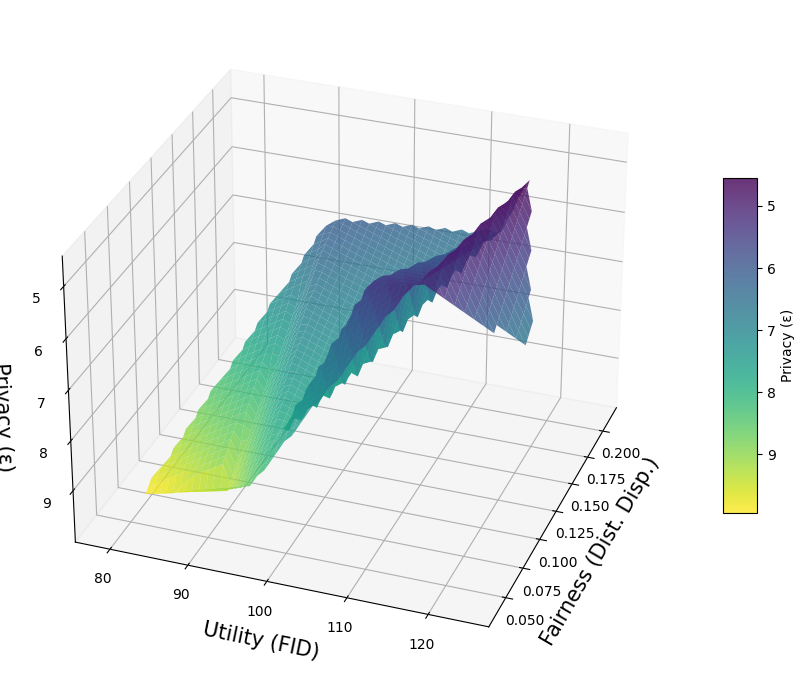

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.interpolate import griddata

df = pd.read_csv("pareto_small.csv")
df.head()

xi, yi = np.meshgrid(np.linspace(df['Fairness'].min(), df['Fairness'].max(), 50), 
                     np.linspace(df['Utility'].min(), df['Utility'].max(), 50))
zi = griddata((df['Fairness'], df['Utility']), df['Privacy'], (xi, yi), method='linear')

# Create the 3D surface plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none', alpha=0.8)
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Privacy (ε)')
cbar.ax.invert_yaxis()

ax.invert_xaxis()
ax.invert_zaxis()

# Labeling the axes
ax.set_xlabel('Fairness (Dist. Disp.)', fontsize=15, labelpad=7)
ax.set_ylabel('Utility (FID)', fontsize=15, labelpad=7)
ax.set_zlabel('Privacy (ε)', fontsize=15, labelpad=7)

ax.view_init(elev=30, azim=20) 

# Show the plot
plt.tight_layout()
# plt.show()
plt.savefig('3d_surface_plot.png')
